# **Support Vector Machine**

**Support Vector Machines** (SVMs) are machine learning algorithms that are used for classification and regression purposes.They are particularly effective for problems with a clear margin of separation between different classes.

## Key Concepts of SVM

### Hyperplane
SVM aims to find the best dividing line (in 2D) or hyperplane (in higher dimensions) that separates data points of different classes.

### Margin
The margin is the distance between the hyperplane and the nearest data points from any class (called **support vectors**). SVM maximizes this margin to ensure the best possible separation between classes.

### Support Vectors
These are the data points closest to the hyperplane. They are critical in defining the position and orientation of the hyperplane. Removing these points would change the hyperplane.

### Linear vs. Non-Linear Data
- For **linearly separable** data, SVM finds a straight hyperplane.
- For **non-linearly separable** data, SVM uses a **kernel trick** to map data into a higher-dimensional space where it becomes linearly separable.

### Kernel Trick
The kernel function transforms the original input space into a higher-dimensional space to handle non-linear relationships. Common kernels include:
- **Linear**
- **Polynomial**
- **Radial Basis Function (RBF)**
- **Sigmoid**

### Soft Margin
If data is not perfectly separable, SVM allows some misclassification by introducing a **slack variable**. This approach balances maximizing the margin and minimizing classification errors.

### Cost Function
SVM minimizes the following objective:

(1/2) * ||w||^2 + C * Σξᵢ

- \( ||w||^2 \): Maximizes the margin (ensuring simplicity of the model).
- \( C \): A regularization parameter that controls the trade-off between margin size and classification error.

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1234px-SVM_margin.png)



In this Jupyter notebook, we're building a simple classifier to predict wether a detected signal comes from a pulsar star or from other sources. Pulsar starts are a very rare type of Neutron start that produce radio emission detectable on Earth.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Data pre-processing**

In [33]:
# Load the dataset
file_path = '/Users/ceciliaalberti/Documents/INDE_577/datasets/pulsar_stars.csv'
df = pd.read_csv(file_path)
df.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [34]:
df.shape

(17898, 9)

We can see that there are 17898 instances and 9 feature variables in the dataset. Considering that the column names are too long, we are creating new column names.

In [35]:
# Rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

Now we'll analyze the target class, to understand if it is a balanced dataset.

In [36]:
# Check distribution of target_class column

df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [37]:
df['target_class'].value_counts() / float(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

The percentage of observations of the class labeled 0 is 90.84% while the class labeled 1 is 9.16%. The dataset is imbalanced.

In [38]:
# Explore missing values
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Text(0, 0.5, 'Number of pulsar stars')

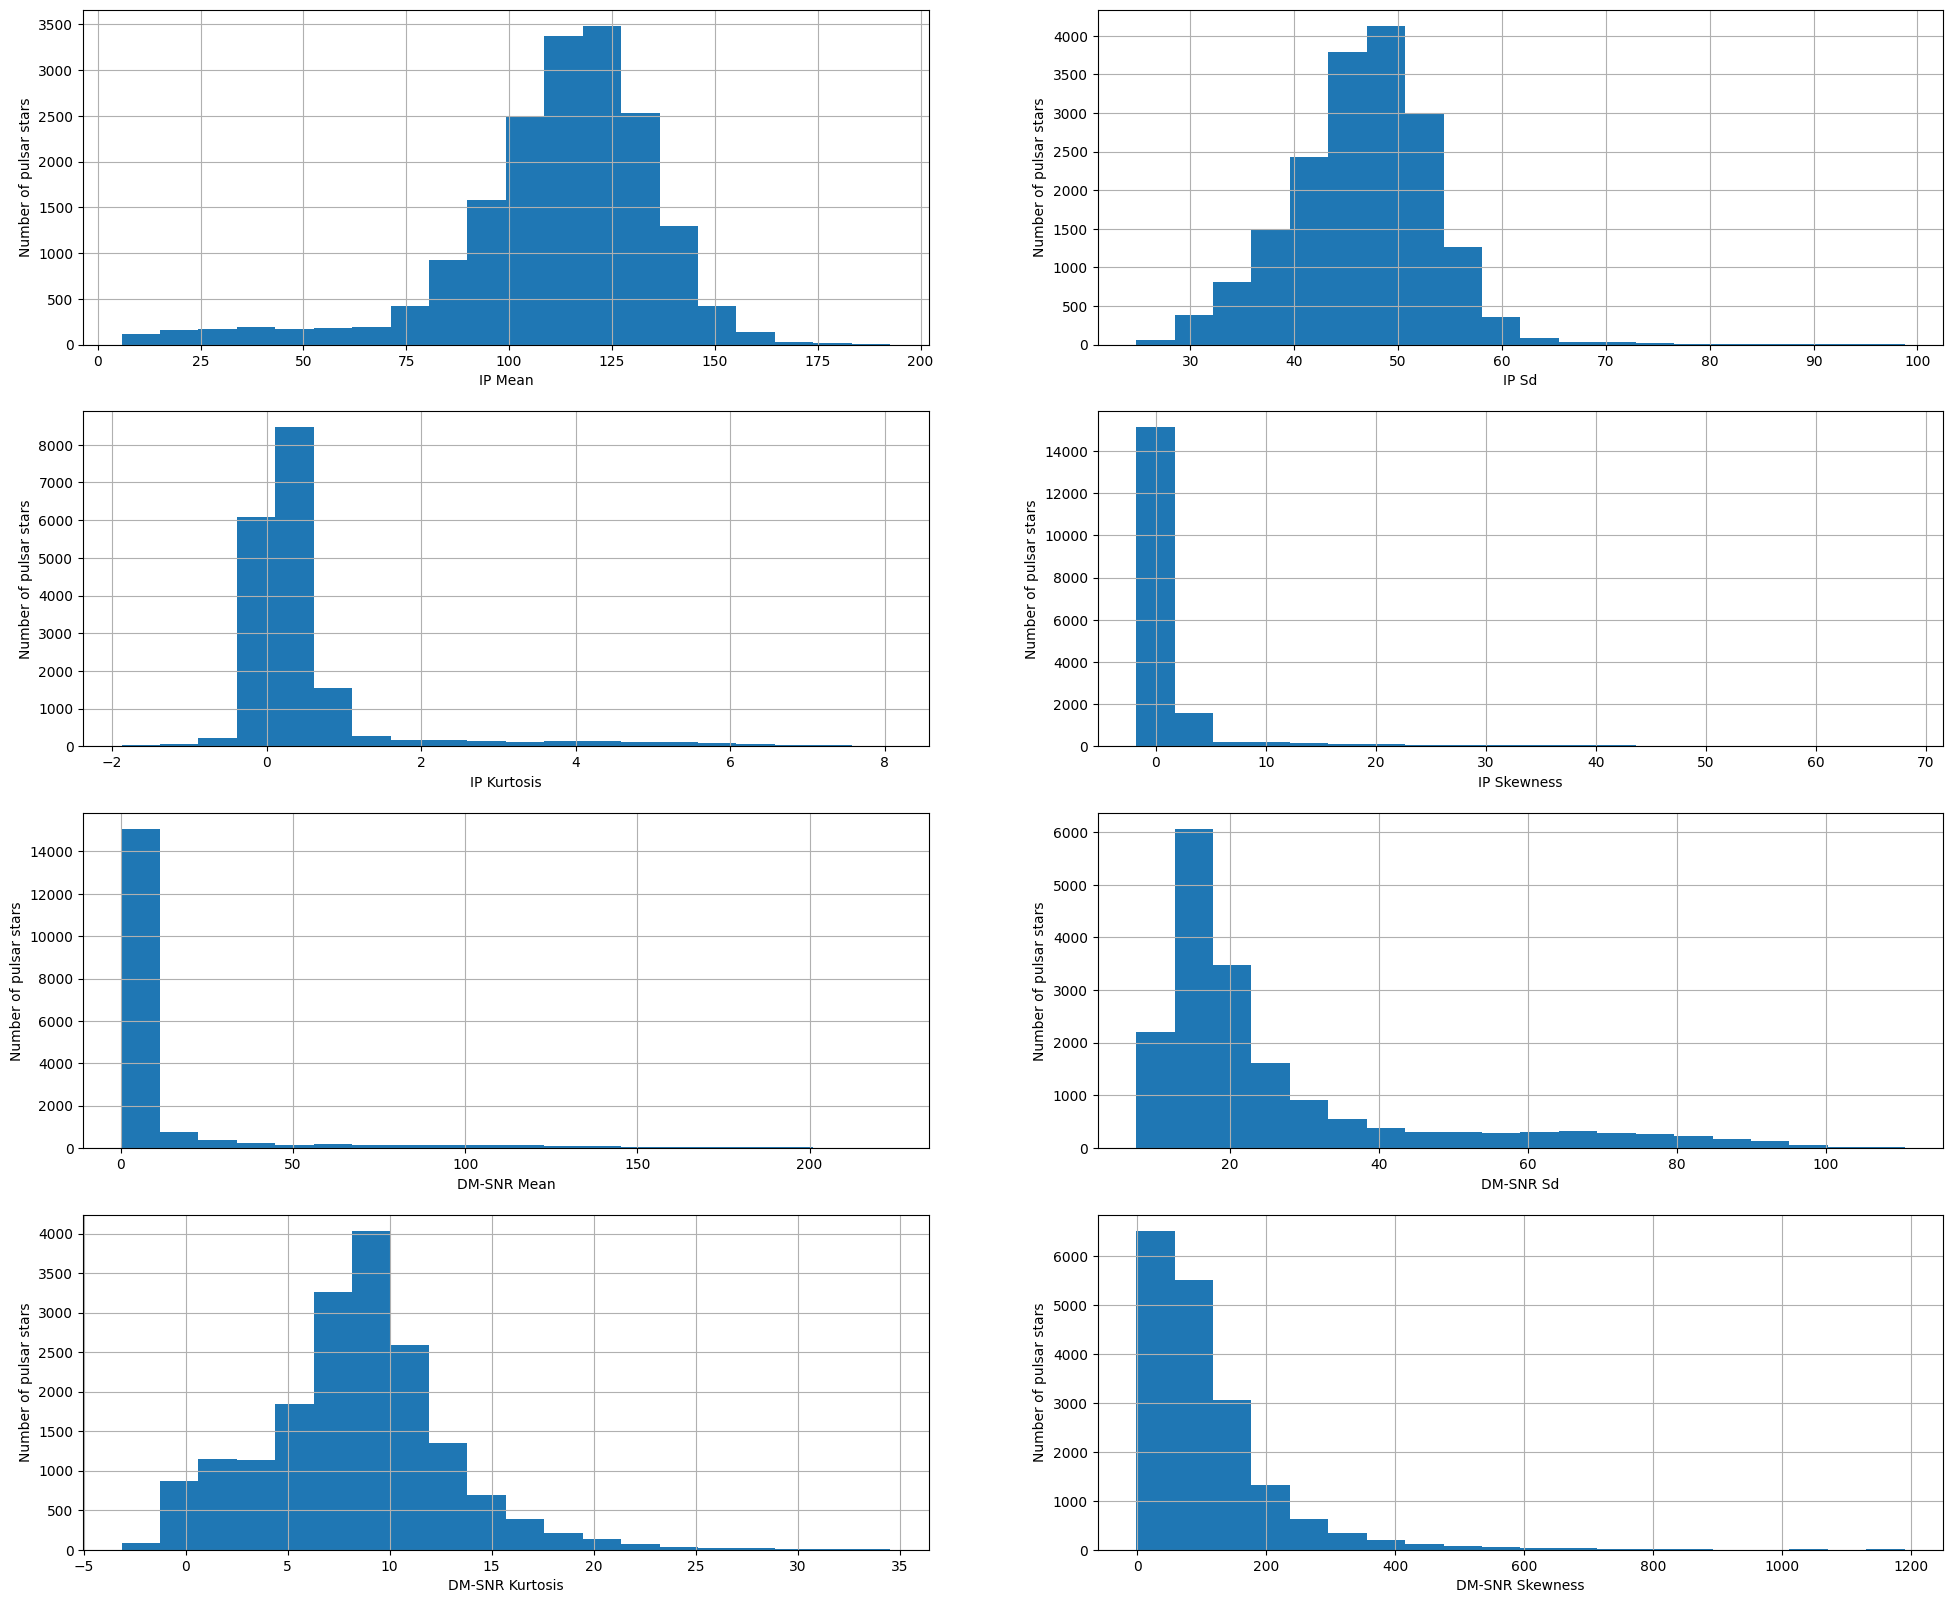

In [40]:
# Histograms

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

## **SVM implementation**


In [43]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrieve column names
cols = X.columns

# Convert scaled data back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=cols)
X_test = pd.DataFrame(X_test_scaled, columns=cols)

### Default hyperparameters

In [48]:
# Classifier with default hyperparameters
svc=SVC() 

# Fit classifier to training set
svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


### RBF Kernel

In [49]:
# Classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# Fit classifier to training set
svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


In [51]:
# Classifier with rbf kernel and C=100
svc=SVC(C=1000.0) 

# Fit classifier to training set
svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


The best accuracy so far is with rbf kernell and C=100.

### Linear kernel

In [54]:
# Classifier with linear kernel and C=1
linear_svc=SVC(kernel='linear', C=1.0) 

# Fit classifier to training set
linear_svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1.0 : 0.9816


In [ ]:
# Classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# Fit classifier to training set
linear_svc100.fit(X_train, y_train)

# Make predictions on test set
y_pred=linear_svc100.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


The best accuracy is with C=100.

### Polynomial kernel

In [57]:
# Classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# Fit classifier to training set
poly_svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=poly_svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [61]:
# Classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# Fit classifier to training set
poly_svc100.fit(X_train, y_train)

# Make predictions on test set
y_pred=poly_svc100.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9824


### Sigmoid kernel

In [59]:
# Classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# Fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# Make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [60]:
# Classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# Fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# Make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


The sigmoid kernel is performs poorly compared to the others. We'll pick one of the best performing models, and move forward with that one. We'll pick linear kernell C=100.

In [65]:
# Classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# Fit classifier to training set
linear_svc100.fit(X_train, y_train)

# Make predictions on test set
y_pred=linear_svc100.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Generate classification report
print(classification_report(y_test, y_pred))


Model accuracy score with linear kernel and C=100.0 : 0.9832
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



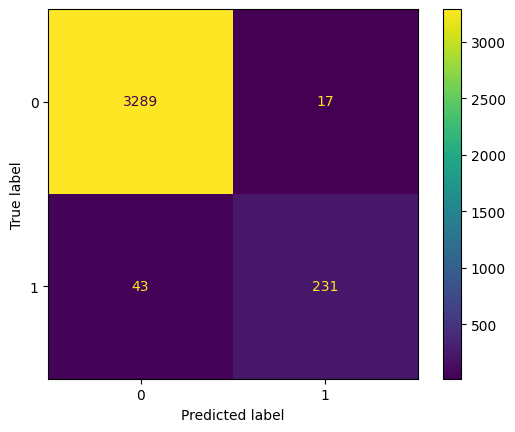

In [67]:
# Generate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
